In [ ]:
'''
NAG(Nesterov Accelerated Gradient):

'''

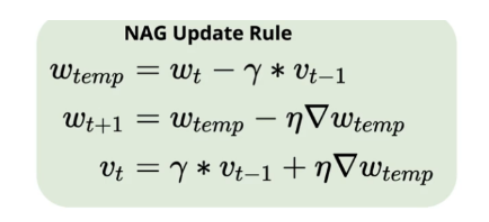

In [ ]:
'''

Varibales in momentum Gradient Descent
    - V  : velocity 
    - β (constant) :  Friction coefficient/smoothing constant which helps in controlling the value of V 
                      and avoids overshooting the minima and simultaneously allowing faster convergence
    - momentum (gamma): denotes the how much of momentum we need to impart to the algorithm
                      
    - V : Hyperparameter
    
    - vw and vb :Varibales used to compute the movement of the gradient based on the history as well as the current gradient.
    
    - vw = momentum * vw + lr * dtheta0
    - theta0 = theta0 - vw
    s
    - vb = momentum * vb + lr * dtheta1
    - theta1 = theta1 - vb


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

X = [30, 35, 37, 59, 70, 76, 88, 100 ]
Y = [1100, 1423, 1377, 1800, 2304, 2588, 3495, 4839]

X = np.reshape(X,(-1,1))
Y = np.reshape(Y,(-1,1))

scaler = MinMaxScaler()
scaler.fit(X)
Y = scaler.transform(X)

In [2]:
lr = 0.1
max_epochs = 1000

momentum =0.9

vw = 0.0
vb = 0.0

print("Some of the initial parameters for Momentum\n")

print("Learnig rate:",lr)
print("momentum:",momentum)

Some of the initial parameters for Momentum

Learnig rate: 0.1
momentum: 0.9


In [3]:
'''
Step 1: Multiply the gamma with our history variables (Velocity)

Step 2 : Gradient is computed by using the subtracted history value theta0 and theta1

'''

'\nStep 1: Multiply the gamma with our history variables (Velocity)\n\nStep 2 : Gradient is computed by using the subtracted history value theta0 and theta1\n\n'

In [5]:
theta0 = 0
theta1 = 0

n = 8

iteration = []
loss = []


for epoch in range(100):
    
    dtheta0 =0
    dtheta1 =0
    iteration.append(epoch)
    
    vw = momentum * vw
    vb = momentum * vb 
    
    for x,y in zip(X,Y):

        theta0 = theta0 - vw
        theta1 = theta1 - vb
        
        #print("\ttheta0:{0} and theta1:{1}".format(theta0,theta1))

        predicted = theta0 * x + theta1

        cost =  (1/n)*np.sum(np.square(y - predicted))
        #print("\tcost:",cost)

        dtheta0 += (-(2/n) * np.sum(np.subtract(y,predicted)))
        dtheta1 += (-(2/n) * np.sum(np.multiply(np.subtract(y,predicted),x)))

    # Update weights
    vw = momentum * vw + lr * dtheta0
    vw = momentum * vb + lr * dtheta1
    
    theta0 = theta0 - vw
    theta1 = theta0 - vb
    
    # Get the loss value for latest weights
    predicted = theta0 * x + theta1
    cost = (1/n)*np.sum(np.square(y - predicted))
    loss.append(cost)

c:\users\insakum46\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
c:\users\insakum46\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in square
c:\users\insakum46\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in multiply
c:\users\insakum46\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in double_scalars
c:\users\insakum46\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in double_scalars


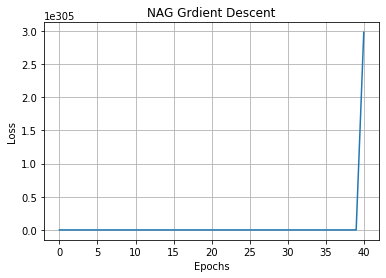

In [6]:
plt.plot(iteration,loss)
plt.title("NAG Grdient Descent")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()